In [2]:
import os
from TwitterAPI import TwitterAPI

api = TwitterAPI(os.environ.get('TW_CONSUMER_KEY'),os.environ.get('TW_CONSUMER_SECRET'),os.environ.get('TW_ACCESS_TOKEN'),os.environ.get('TW_ACCESS_TOKEN_SECRET'))

In [3]:
tweets = []
while True:
    r = api.request('statuses/filter',{'track':'i','language':'en'})
    if r.status_code != 200:
        break
    else:
        for item in r.get_iterator():
            tweets.append(item)
            if len(tweets) > 10000:
                break
            elif len(tweets) % 100 == 0:
                print(len(tweets))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [4]:
print(len(tweets))

10002


In [5]:
print('text: ', tweets[0]['text'])
print('description: ', tweets[0]['user']['description'])
print('name: ', tweets[0]['user']['name'])
print('location: ', tweets[0]['user']['location'])

text:  You know I’m driving off without second guessing https://t.co/rjRsyZdi9n
description:  Uchiha Clique // RattPack // PLP
name:  Vash The Stampede
location:  None


In [6]:
tweets = [t for t in tweets if 'text' in t]

In [7]:
len(tweets)

9235

In [12]:
import re
tokens = []
for tweet in tweets:
    text = tweet['text'].lower()
    text = re.sub('@\S+', ' ', text) #remove mentions
    text = re.sub('http\S+', ' ', text) #remove http link
    tokens.append(re.findall('[A-Za-z]+',text)) #retain words
print(len(tokens))
tokens[0]

9235


['you', 'know', 'i', 'm', 'driving', 'off', 'without', 'second', 'guessing']

In [13]:
from collections import Counter

word_counts = Counter()
for tweet in tokens:
    word_counts.update(tweet)
word_counts['i']

10598

In [14]:
import math

print(len(word_counts),'unique terms')


11591 unique terms


In [15]:
vocab = set([w for w,c in word_counts.items() if c>2])
print('%d words occur at least three times: ' %len(vocab))

3633 words occur at least three times: 


In [16]:
newtoks = []
for i, tweet in enumerate(tokens):
    newtok = [token for token in tweet if token in vocab]
    if len(newtok) > 0:
        newtoks.append(newtok)
tokens = newtoks

In [17]:
len(tokens)

9211

In [18]:
tokens[0]

['you', 'know', 'i', 'm', 'driving', 'off', 'without', 'second', 'guessing']

In [19]:
import numpy as np
def get_contexts(tweet, i, window):
    features = []
    for j in range(np.amax([0, i-window]), i):
        features.append(tweet[j] + '@' + str(j-1))
    for j in range(i+1, min(i + window + 1, len(tweet))):
        features.append(tweet[j] + '@' + str(j-1))
    return features
print(tokens[0])
get_contexts(tokens[0], i=3, window = 2)

['you', 'know', 'i', 'm', 'driving', 'off', 'without', 'second', 'guessing']


['know@0', 'i@1', 'driving@3', 'off@4']

In [21]:
from collections import defaultdict

contexts = defaultdict(lambda: Counter())
window = 2
print(tokens[0])
for tweet in tokens:
#     print(tweet)
    for i,token in enumerate(tweet):
        features = get_contexts(tweet,i,window)
        contexts[token].update(features)

['you', 'know', 'i', 'm', 'driving', 'off', 'without', 'second', 'guessing']


In [23]:
contexts['i']

Counter({'you@-1': 2,
         'know@0': 36,
         'm@2': 92,
         'driving@3': 1,
         'funny@2': 1,
         'asf@3': 1,
         'stg@5': 1,
         'rt@-1': 2149,
         'don@1': 102,
         't@2': 173,
         'care@3': 15,
         'if@4': 27,
         'broke@6': 16,
         'my@7': 30,
         'damn@8': 17,
         'ankles@9': 15,
         'met@11': 15,
         'the@12': 24,
         'yee@4': 9,
         'challenge@5': 9,
         'think@7': 27,
         'i@8': 18,
         'i@6': 15,
         'm@9': 57,
         'still@10': 12,
         'work@14': 1,
         'is@15': 1,
         'have@17': 6,
         'no@18': 3,
         'in@7': 14,
         'public@8': 1,
         'm@10': 44,
         'not@11': 5,
         'm@0': 304,
         'i@1': 61,
         'i@-1': 44,
         'jus@2': 3,
         'love@3': 26,
         'seen@0': 4,
         'call@1': 6,
         'll@0': 31,
         'go@1': 9,
         'guess@0': 14,
         'she@1': 2,
         'out@15': 4,
   

In [31]:
tweet_freq = Counter()
for context in contexts.values():
    tweet_freq.update(context)
tweet_freq.most_common(5)

[('rt@-1', 10097), ('i@0', 6652), ('i@-1', 4060), ('i@1', 2670), ('i@7', 2319)]

In [87]:
Counter(tweet_freq.values())

Counter({1: 25,
         2: 2346,
         3: 1642,
         4: 9355,
         5: 87,
         6: 840,
         7: 383,
         8: 2706,
         9: 150,
         10: 299,
         11: 208,
         12: 1240,
         13: 44,
         14: 165,
         15: 184,
         16: 647,
         17: 45,
         18: 160,
         19: 110,
         20: 428,
         21: 60,
         22: 86,
         23: 73,
         24: 301,
         25: 26,
         26: 76,
         27: 74,
         28: 177,
         29: 24,
         30: 63,
         31: 41,
         32: 132,
         33: 31,
         34: 46,
         35: 40,
         36: 120,
         37: 14,
         38: 32,
         39: 42,
         40: 80,
         41: 13,
         42: 38,
         43: 19,
         44: 82,
         45: 19,
         46: 24,
         47: 24,
         48: 61,
         49: 10,
         50: 32,
         51: 25,
         52: 61,
         53: 8,
         54: 29,
         55: 20,
         56: 47,
         57: 15,
         58: 19,

In [43]:
import math
cnt = 1
for term, context in contexts.items():
    for term2, frequency in context.items():
        context[term2] = frequency/(1. + math.log(tweet_freq[term2]))
    length = math.sqrt(sum([v*v for v in context.values()]))
    for term2, frequency in context.items():
        context[term2] = 1. * frequency/length
contexts['i'].most_common(5)

[('rt@-1', 0.5866422275925893),
 ('m@1', 0.1649153734693732),
 ('m@0', 0.14379823706691308),
 ('vote@0', 0.12516126817878048),
 ('m@8', 0.12192123706297245)]

In [45]:
contexts['love'].most_common(5)

[('i@0', 0.27733698231966863),
 ('i@-1', 0.2604138735001036),
 ('rt@-1', 0.18107418517798898),
 ('i@1', 0.11965766270102315),
 ('god@0', 0.11830861950151922)]

In [48]:
contexts['hate'].most_common(5)

[('i@-1', 0.19504837522408522),
 ('movies@3', 0.1786649132001757),
 ('niggas@2', 0.1786649132001757),
 ('dogs@4', 0.1786649132001757),
 ('livin@18', 0.1786649132001757)]

In [49]:
contexts['school'].most_common(5)

[('con@17', 0.24469721227789784),
 ('tw@22', 0.24469721227789784),
 ('kindergarten@12', 0.24469721227789784),
 ('attended@9', 0.21968261350576496),
 ('graduate@10', 0.21968261350576496)]

In [52]:
def distance(c1, c2):
    if len(c1) == 0 or len(c2) == 0:
        return 1e9
    keys = set(c1.keys()) | set(c2.keys())
    distance = 0
    for k in keys:
        distance += (c1[k] - c2[k]) ** 2
    return math.sqrt(distance)

print(distance({'hi':10,'bye':5},{'hi':9,'bye':4}))
print(distance({'hi':10,'bye':5},{'hi':8,'bye':4}))

1.4142135623730951
2.23606797749979


In [54]:
def find_closest(term, n=5):
    terms = np.array(list(contexts.keys()))
    context = contexts[term]
    distances = []
    for term2, context2 in contexts.items():
        distances.append(distance(context,context2))
    return terms[np.argsort(distances)][:n]

find_closest('love',n=10)

array(['love', 'm', 'rt', 'am', 'i', 'think', 'just', 'can', 'want', 've'], 
      dtype='<U18')

In [61]:
nz_contexts = [t for t, context in contexts.items() if len(context) > 1]
contexts = dict([(term, contexts[term]) for term in nz_contexts])
print(len(nz_contexts),'nonzero contexts')

3633 nonzero contexts


In [64]:
list(contexts.keys())[0]

'you'

In [68]:
list(list(contexts.values())[0].items())[:3]

[('know@0', 0.0202001205891367),
 ('i@1', 0.03200703629244904),
 ('rt@-1', 0.091572882037615)]

In [69]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()
X = vec.fit_transform(contexts.values())
names = np.array(vec.get_feature_names())
print(names[:10])
print(X[0])

['a@-1' 'a@0' 'a@1' 'a@10' 'a@11' 'a@12' 'a@13' 'a@14' 'a@15' 'a@16']
  (0, 0)	0.00385819769731
  (0, 2)	0.00241104660285
  (0, 3)	0.0134357859599
  (0, 4)	0.00335309571128
  (0, 5)	0.265825653322
  (0, 7)	0.00508945683988
  (0, 8)	0.00358366304599
  (0, 9)	0.00927048269846
  (0, 11)	0.00494546623566
  (0, 12)	0.00636060130296
  (0, 13)	0.0114351203106
  (0, 14)	0.00802202974053
  (0, 19)	0.0068464081176
  (0, 23)	0.00658047242342
  (0, 26)	0.00253720948804
  (0, 29)	0.0114164315023
  (0, 30)	0.0242911646687
  (0, 31)	0.00738918481838
  (0, 32)	0.0160011254112
  (0, 33)	0.0130105780285
  (0, 57)	0.00684266851656
  (0, 60)	0.00690710386647
  (0, 61)	0.0170824649179
  (0, 62)	0.00655227284878
  (0, 65)	0.00650879306712
  :	:
  (0, 24342)	0.0018134938626
  (0, 24348)	0.00788486836534
  (0, 24349)	0.0406044357438
  (0, 24350)	0.010808831669
  (0, 24351)	0.0132408700179
  (0, 24352)	0.0127844151845
  (0, 24353)	0.0384047499055
  (0, 24354)	0.0316474980384
  (0, 24366)	0.0097931010348
  (0, 

In [70]:
love_idx = list(contexts.keys()).index('love')
print(love_idx)

82


In [71]:
print(X[love_idx])

  (0, 2)	0.0098330719939
  (0, 3)	0.0040589427163
  (0, 5)	0.00327037060968
  (0, 8)	0.00487180085908
  (0, 13)	0.0172727142399
  (0, 14)	0.00545276311972
  (0, 26)	0.00344920245147
  (0, 29)	0.00776001818346
  (0, 31)	0.00803616556222
  (0, 33)	0.0035374388944
  (0, 66)	0.00683953013286
  (0, 72)	0.00627569734215
  (0, 73)	0.0396592914363
  (0, 74)	0.00649228037446
  (0, 75)	0.00719366921082
  (0, 76)	0.00634434991323
  (0, 82)	0.0453274393012
  (0, 83)	0.0123119560135
  (0, 94)	0.0275752286231
  (0, 112)	0.037742189215
  (0, 223)	0.0490542868764
  (0, 365)	0.0142001492791
  (0, 480)	0.0275752286231
  (0, 513)	0.0104270793322
  (0, 514)	0.00741965022209
  :	:
  (0, 24339)	0.0239021114241
  (0, 24341)	0.0127961625719
  (0, 24342)	0.00493069847492
  (0, 24348)	0.0257257502056
  (0, 24349)	0.0286220087762
  (0, 24350)	0.0293880728934
  (0, 24351)	0.0135001982121
  (0, 24352)	0.0130348035123
  (0, 24353)	0.012048284192
  (0, 24354)	0.00905749559085
  (0, 24366)	0.00665660211661
  (0, 2436

In [78]:
print(names[24403])

yourself@17


In [79]:
from sklearn.cluster import KMeans
num_clusters = 20
kmeans = KMeans(num_clusters)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [80]:
for i in range(num_clusters):
    print(i,' '.join(names[np.argsort(
        kmeans.cluster_centers_[i])[::-1][:5]]))

0 a@13 had@9 time@19 of@16 i@10
1 a@7 the@5 out@8 and@2 through@4
2 a@4 rt@-1 a@8 a@1 a@3
3 and@17 but@5 i@18 demand@9 too@7
4 a@20 humans@12 across@19 a@19 ms@13
5 i@-1 i@0 rt@-1 i@1 i@2
6 rt@-1 i@0 i@3 i@1 i@2
7 and@7 amp@9 of@10 open@5 decision@9
8 need@5 luminiera@7 luminiera@8 luminiera@5 omega@6
9 to@7 she@6 or@8 to@10 gives@7
10 rt@-1 i@-1 the@13 i@5 the@3
11 on@5 via@9 shopmycloset@10 myself@4 on@6
12 and@19 extremely@19 d@9 hateful@20 continued@7
13 in@10 your@11 in@7 ariasbrunomars@7 said@10
14 approval@9 rcp@10 ratings@8 part@11 average@11
15 your@9 ve@5 start@8 already@6 offerin@18
16 about@5 you@11 be@3 bantering@4 all@9
17 to@4 like@8 be@5 bitch@9 fanchanting@7
18 amp@16 al@17 thrush@13 mostly@9 menendez@15
19 my@4 the@4 her@7 of@1 missuniverse@6


In [82]:
distances = kmeans.transform(X)
print('distance from term "love" to each cluster:')
print(distances[love_idx])
print('closest cluster to "love"')
print(np.argmin(distances[love_idx]))

distance from term "love" to each cluster:
[ 0.99901751  0.99657791  0.99227656  0.99402414  0.99748698  0.90512837
  0.96409513  1.00029881  1.05995216  0.99756027  0.99017547  0.99303393
  1.00927706  0.99561405  1.04653704  0.99876205  0.99423793  0.99309845
  1.08283356  0.99504303]
closest cluster to "love"
5


In [83]:
terms = np.array(list(contexts.keys()))
for i in range(distances.shape[1]):
    print(i,' '.join(terms[np.argsort(distances[:,i])[1:10]]), '\n')

0 rhetorical question clip translate pound enough mass waste little 

1 halfway speech about through wise wrote the i daniel 

2 man to a the m is this and that 

3 micdrop i ex beings emotionally physically ago supportive while 

4 no border sneaking explanation wilcox rter po animals ronnie 

5 m love just think can am don t want 

6 m am rt love when just hey can think 

7 bored reply policy image therapist behaviour di ton comment 

8 lvl omega luminiera heeelp id groups specifically remove speed 

9 double felt to infinity makeup threat collect text triple 

10 to the and a m of this is that 

11 on jacket vintage poshmark shopmycloset via size paradise complaining 

12 hateful organization fantastic nowadays pomegranates program bitches foolish towards 

13 coworker arrows vape sharpie cuts journalism harassment i notonepenny 

14 approval rcp average own studio star part opinion play 

15 already start work seen trap thing definition they ever 

16 wish gonna rehab happy i camp 

In [84]:
kmeans.score(X)

-3593.8763542449688

k=5 score=3613.9
k=10 score=3607.41
k=20 score=3593.62
k=50 score=3553.73
k=100 score=3483.09


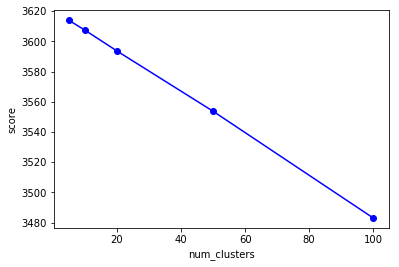

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

scores = []
num_cluster_options = [5,10,20,50,100]

for num_clusters in num_cluster_options:
    kmeans = KMeans(num_clusters, n_init = 10, max_iter = 10)
    kmeans.fit(X)
    score = -1 * kmeans.score(X)
    scores.append(score)
    print('k=%d score=%g' %(num_clusters, score))

plt.figure()
plt.plot(num_cluster_options, scores , 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('score')
plt.show()

score=3596.01
score=3595.86
score=3595.13
score=3595.04
score=3595.95
score=3598.89
score=3595.27
score=3596.38
score=3596.52
score=3595.26


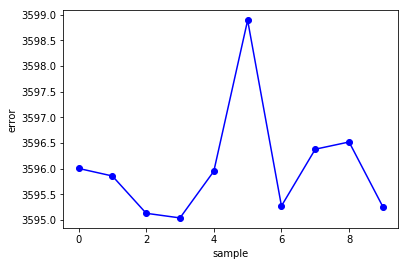

In [86]:
scores = []
for i in range(10):
    kmeans = KMeans(20, n_init = 1,
                        max_iter=100,
                        init = 'random')
    kmeans.fit(X)
    score = -1 * kmeans.score(X)
    scores.append(score)
    print('score=%g' %(score))

plt.figure()
plt.plot(range(10), scores, 'bo-')
plt.xlabel('sample')
plt.ylabel('error')
plt.show()